# Multiple Linear Regression in Python

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Necessary-Python-packages" data-toc-modified-id="Necessary-Python-packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Necessary Python packages</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Pairs-plots" data-toc-modified-id="Pairs-plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pairs plots</a></span></li><li><span><a href="#Plotting-categorical-variables" data-toc-modified-id="Plotting-categorical-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting categorical variables</a></span></li><li><span><a href="#Data-issues:-Colinearity" data-toc-modified-id="Data-issues:-Colinearity-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data issues: Colinearity</a></span></li><li><span><a href="#Student-Income-Interaction" data-toc-modified-id="Student-Income-Interaction-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Student-Income Interaction</a></span></li></ul></li><li><span><a href="#Variable-Selection" data-toc-modified-id="Variable-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variable Selection</a></span><ul class="toc-item"><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Final Model</a></span></li></ul></li><li><span><a href="#Model-Assumptions" data-toc-modified-id="Model-Assumptions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Assumptions</a></span><ul class="toc-item"><li><span><a href="#Linearity" data-toc-modified-id="Linearity-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linearity</a></span></li><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Multicolinearity</a></span></li><li><span><a href="#Independence-/-Equal-Variance" data-toc-modified-id="Independence-/-Equal-Variance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Independence / Equal Variance</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Normality</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Outlier Detection</a></span></li></ul></li><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Performance</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Coefficients" data-toc-modified-id="Coefficients-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Coefficients</a></span></li></ul></li></ul></div>

##  Overview 
We will perform multiple linear regression on the credit dataset––all in python! We will address the following research questions:
1. Are the collected variables able to adequately predict a person's credit balance?
2. Do people generally get "more responsible" (in terms of lower balances) with money as
they age?
3. Current policy suggests that limit should increase by 10% of an income increase. Under
this policy, what is the expected difference in credit balance when a person's income goes
up by 10,000?
4. What should the company's policy be for increasing credit limit for increases in income?

###  Necessary Python packages

We will perform regression primarily using the **`statsmodels`** and **`pandas`** packages. Though **`sklearn`** is another library you could use, it is built more for black-box predictions rather than statistical inference. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  # Plotting
import statsmodels.api as sm  # For linear regression
import statsmodels.formula.api as smf
import seaborn as sns  # Pairs plots /boxplots
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from patsy import dmatrix  # design matrix
from scipy.stats import t  # T distribution
from re import sub  # string manipulation
from VariableSelectionForLM import BestSubsets_MLR  # Dr.Heaton's code (Best Subsets selection)

## Exploratory Data Analysis
First we read in the data. The **`pandas`** library has a `read_csv` function that is similar to R's read.csv(). We can look at the first 5 observations using `.head()` to make sure data was read in correctly. The csv file is read in as a pandas dataframe, which allows columns of different types. We also look at the types of each column to make sure the variables are the correct type.

In [4]:
credit = pd.read_csv('CreditDebt.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,581.74
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,1259.22
2,104.593,7075,514,4,71,11,Male,No,No,Asian,301.46
3,148.924,9504,681,3,36,11,Female,No,No,Asian,878.14
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,509.92


In [5]:
credit.dtypes # Objects are fine for factors

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance      float64
dtype: object

### Pairs plots
**`pandas`** has a built-in function called `plotting.scatter_matrix` that creates pairs plots similar to R. Since it only makes sense to plot numeric variables, we filter out the categorical variables. `.iloc[:,:]` allows us to index dataframes by row/column numbers. ***Also, note that <u>python starts indexes at 0, not 1</u>!*** The alpha arguement allows us to adjust transparency, which can help us see the density of the plots. 

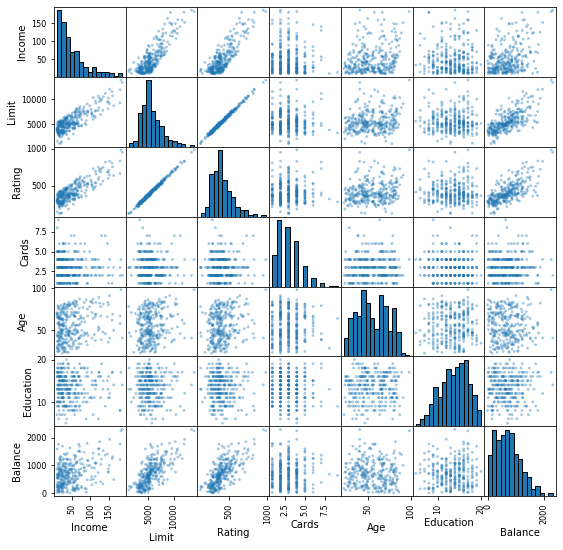

In [6]:
credit_num = credit.iloc[:,np.where(credit.dtypes != 'object')[0]] # np.where() = which() in R
grr = pd.plotting.scatter_matrix(credit_num, figsize=(9,9), marker='o',
                                 hist_kwds={'bins': 15, 'edgecolor': 'k'}, s=8, alpha=.4, range_padding=.1)

For those interested, **`seaborn`** allows you to customize the upper, lower, and middle diagonals. 

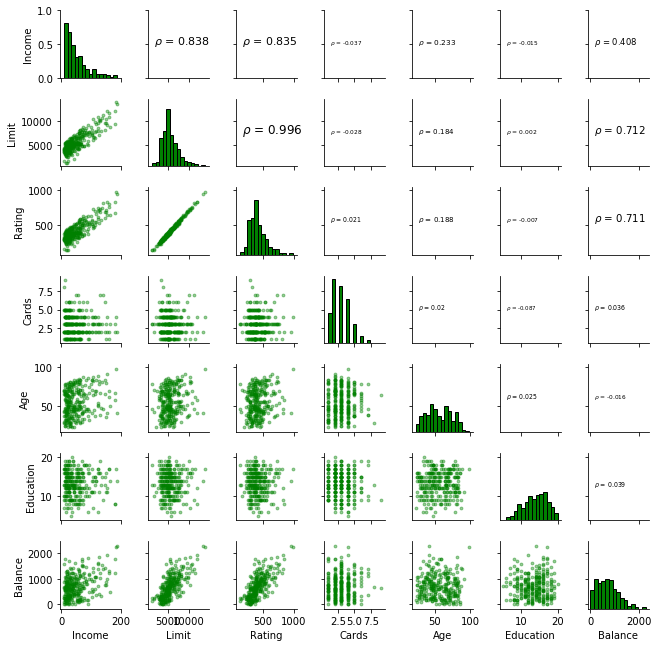

In [7]:
# Function applies correlation label to upper-diagonal plots
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 3))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.1, 0.5), size = 12*(1-(1-coef)/2), xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= credit_num, height = 1.3)

# Map the plots to the locations
grid = grid.map_lower(plt.scatter, color = 'green',alpha=.4, s=8)
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Greens_d') # 2D kernel density plots
grid = grid.map_diag(plt.hist, bins = 15, edgecolor =  'k', color = 'green')
plt.show()
#plt.style.use('default') # Resets label size

### Plotting categorical variables
In order to place plots side by side, call `plt.subplot(nrow, ncol, plot_num)` before making each plot. 

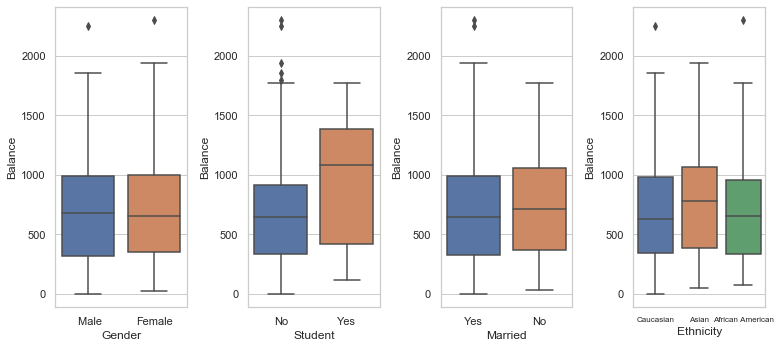

In [8]:
sns.set(style="whitegrid")
cat_vars = np.where(credit.dtypes =='object')[0]
plt.figure(figsize=(11,5))
for i in range(len(cat_vars)):
    plt.subplot(1, len(cat_vars), i+1)
    sns.boxplot(x=credit.columns[cat_vars[i]], y="Balance", data=credit)
    if(i == 3): plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

### Data issues: Colinearity
Problem: Limit and rating are very correlated (VIF over 180). We create the formula string by joining each column name (except the response) with a '+'.

The VIF function is located in the `statsmodels.stats.outliers_influence` library. Since the function only does 1 column at a time, we use a list comprehension (similar to lapply()) to get the VIF for every column in the **X** matrix.

In [9]:
formula_X = '+'.join(credit.columns.drop('Balance')) 
formula = 'Balance~' + formula_X + '+Student:Income' # R style formula calls. Added interaction. 
# Side note: Can also use C() here to change variable names to factors. 
design_mat = dmatrix(formula_X, data=credit, return_type='dataframe') # model.matrix()
vifs = pd.Series([vif(np.asarray(design_mat), i) \
                  for i in range(1,design_mat.shape[1])],index=design_mat.columns[1:])
vifs

Gender[T.Female]            1.019315
Student[T.Yes]              1.111067
Married[T.Yes]              1.051370
Ethnicity[T.Asian]          1.566113
Ethnicity[T.Caucasian]      1.553807
Income                      3.572748
Limit                     184.319153
Rating                    181.354577
Cards                       1.430544
Age                         1.068269
Education                   1.040293
dtype: float64

### Student-Income Interaction
It is thought that the effect of income on balance is different for students than for non-students. To visualize this, we use an interaction plot. This was calculated by using an ANCOVA model, or equilavently, by fitting two marginal linear models for students and non-students. 

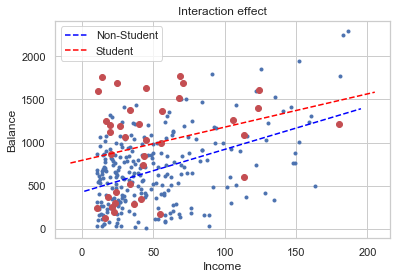

In [10]:
# Similar to R's abline() function
def abline(intercept, slope, lab='', col='black'):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',color=col, label=lab)


coef_int = smf.ols('Balance ~ Income*Student', data=credit).fit().params
plt.plot('Income', 'Balance', 'b.', data=credit.loc[credit['Student'] == 'No',:],label='')
plt.plot('Income', 'Balance', 'ro', data=credit.loc[credit['Student'] == 'Yes',:],label='')
abline(coef_int[0], coef_int[2], 'Non-Student', 'blue') # OLS non-students
abline(coef_int[0]+coef_int[1], coef_int[2]+coef_int[3], 'Student',col='red') # OLS students
plt.legend()
plt.ylabel('Balance')
plt.xlabel('Income')
plt.title('Interaction effect')
plt.show()

# The Model
## Variable Selection 
The full model (including the student:income interaction) contains 12 $\beta$ effects. Earlier, we saw that limit and rating had a high VIF. To eliminate redundant variables and control for overfitting, we can use stepwise regression. Although you could implement these yourself, python doesn't really have libraries that do this. Dr. Heaton has implemented forward, backward, and best subset regression in the VariableSelectionForLM.py file. We will use best subsets regression using AIC. This will leave more variables in the model for inference questions and make better predictions. 

In [11]:
best_subsets = BestSubsets_MLR(formula, credit, IC="AIC", top_models=5)
best_model = best_subsets.iloc[0,:]
best_model
# Since we don't have categories w/more than 2 levels left, we can just use the names
names = [sub('\[T.*\]', '', x) for x in best_model['Model']] # Gets rid of [T.cat_var]

# Final Model
# Income, Limit, Cards, Age, Student
sel_vars = np.sort([np.where(x == credit.columns)[0][0] for x in names]) # Index numbers for selected vars
formula = 'Balance~' + '+'.join(credit.columns[sel_vars])

fitted = smf.ols(formula, data=credit)
fit = fitted.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           9.25e-94
Time:                        11:02:24   Log-Likelihood:                -1987.2
No. Observations:                 294   AIC:                             3986.
Df Residuals:                     288   BIC:                             4009.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.7474     63.062     -8.686      0.000    -671.868    -423.627
Student[T.Yes]   531.8299     37.968     14.007      0.000     457.099     606.560
Income            -8.5056      0.601    -14.150      0.000      -9.689      -7.323
Limit              0.3054      0.011     27.101      0.000       0.283       0.328
Cards             16.5929      8.536      1.944      0.053      -0.208      33.394
Age               -2.3365      0.729     -3.205      0.002      -3.771      -0.902
==============================================================================
Omnibus:                        1.746   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.460
Skew:                           0.150   Prob(JB):                        0.482
Kurtosis:                       3.173   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final Model

`smf.ols(...).fit().summary()` is similar to R's `summary(lm())` output. Our final model is as follows:

$$
\begin{equation}
\begin{split}
Balance_i = & \beta_0 + \beta_1(Income_i) + \beta_2(Limit_i) + \beta_3(Cards_i) + \beta_4(Age_i) + \beta_5(Student_i) + \epsilon_i \\ &\epsilon_i \stackrel{iid}{\sim} N(0, \sigma^2)
\end{split}
\end{equation}
$$

## Model Assumptions

### Linearity

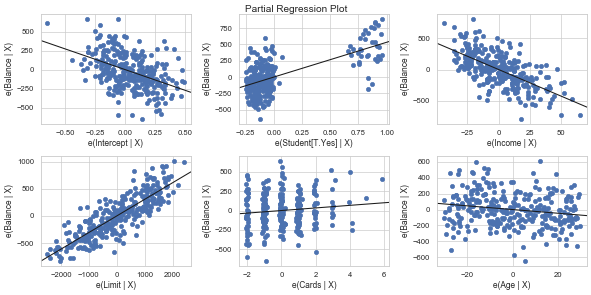

In [12]:
# Added variable plots
fig = plt.figure(figsize=(12,6), dpi=50)
fig = sm.graphics.plot_partregress_grid(fit, fig=fig,grid=(2,3))
plt.show()

### Multicolinearity

In [13]:
X = fitted.exog # Design matrix
[round(vif(X, i),4) for i in range(1,X.shape[1])] # VIFs much better

[1.0499, 3.5482, 3.5274, 1.0024, 1.0602]

### Independence / Equal Variance 

Was the data taken from a random sample? We can sometimes tell when there aren't structural patterns in the residuals. We can also check equal variance assumptions using a residuals vs fitted plot.

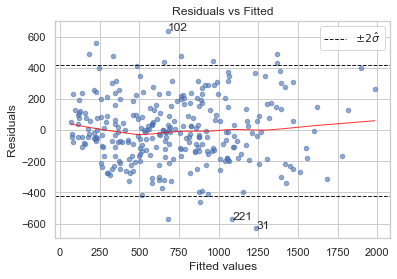

In [14]:
# Fitted vs Residuals
yhat = fit.fittedvalues
resid = fit.resid
sigma_hat = fit.mse_resid**.5

plt.figure(figsize=(6,4))
sns.regplot(y=resid, x=yhat, lowess=True,  
                          scatter_kws={'alpha': 0.6, 's':20}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=2*sigma_hat, ls='--', color='k', lw=1, label='$ \pm 2 \hat{\sigma}$')
plt.axhline(y=-2*sigma_hat, ls='--', color='k', lw=1)
plt.legend()

# annotations (top 3 largest residuals in magnitude)
abs_resid = abs(resid).sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plt.annotate(i, xy=(yhat[i], resid[i]));
plt.show()

### Normality

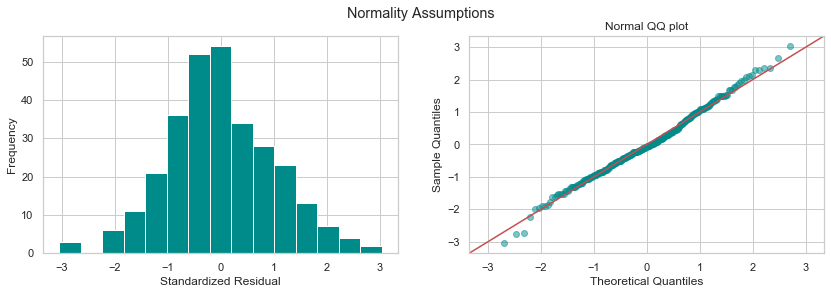

In [296]:
#Using standardized residuals
stand_resid = fit.get_influence().resid_studentized_internal
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# First plot
axs[0].hist(stand_resid, bins=15, color='darkcyan')
axs[0].set_xlabel('Standardized Residual')
axs[0].set_ylabel('Frequency')

# Second plot
axs[1].set_title('Normal QQ plot')
sm.qqplot(data = stand_resid, line='45', ax=axs[1], color='darkcyan', alpha=.5) # Had trouble with plt.subplots
plt.suptitle('Normality Assumptions')
plt.show()

### Outlier Detection

We check for outliers with two plots. The first plot checks to see if any outliers have high infleunce. The cutoff used for leverage was $\frac{2p}{n}$ and the cutoff for the studentized residuals was found using $t_{(n-1)-p}$ quantiles. As can be seen, there are many points with moderate influence, but none have a high residual value. Cook's distance for the $i^{th}$ observation shows the average distance that $\hat{\beta}$ moves after the $i^{th}$ datapoint is taken out, weighted by the variance of the $\hat{\beta}$s. Cook's distance is a measure of how much of a "bad outlier" a point is. Although a frequently used cutoff for Cook's Distance is $4/n$, we can just look for distances that are unusual relative to the others. Points 31, 22, and 221 may be considered outliers, but they are not severe.

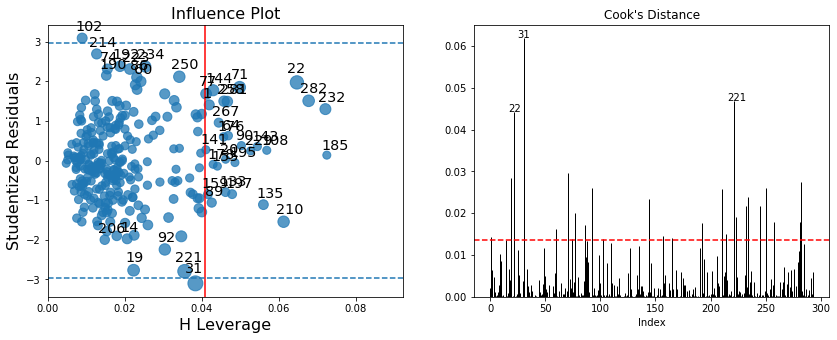

In [7]:
p = len(fit.params)
n = credit.shape[0]
cooksd = fit.get_influence().cooks_distance[0]

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sm.graphics.influence_plot(fit, ax=ax[0], criterion="cooks",size=15)
ax[0].set_xlim(left=0)
ax[0].axvline(x=2*p/n, color='red')
ax[0].axhline(y=t.ppf(.5/n,df=(n-1)-p), ls='--')
ax[0].axhline(y=-t.ppf(.5/n,df=(n-1)-p), ls='--')

ax[1].bar(range(n), cooksd, width=0, ec='k')
ax[1].axhline(y=4.0/n, ls='--', color='red')
for i in pd.Series(cooksd).sort_values(ascending=False).head(3).index: # Annotates top 3
    plt.annotate(i, xy=(i-6, cooksd[i]))
ax[1].set_title("Cook's Distance")
ax[1].set_xlabel('Index')
plt.show()

# Although some are above cutoff, none are severe

## Model Performance
Now we are ready to check model performance and answer the first research question. Using Leave-One-Out Cross Validation, we will test for model performance in terms of prediction interval width, prediction interval coverage, and prediction error. The average width was about 838, which was 36% of the range of the response variable. The root predictive mean squared error was roguhly 213.7, which could indicate high variance in the predictions. If we had used BIC instead, we could have gotten lower variances in our prediction. However, our model is explaining about 77.4% more variation than just the response mean, which is good.

In [10]:
pi_wd = np.zeros(n)
pi_cv = pi_wd.copy()
sq_err = pi_wd.copy()

# LOO-CV
for i in range(n):
    test_val = credit.iloc[i,:]
    train = credit.iloc[i != np.arange(n),:]
    fit_train = smf.ols(formula, data=train).fit()
    pred = smf.ols(formula, data=train).fit().get_prediction(test_val).summary_frame(alpha=.05)
    pred_val = pred.iloc[0,0]
    true_val = test_val.Balance
    
    # Prediction Inverval width
    pi_wd[i] = pred.iloc[0,5] - pred.iloc[0,4]
    
    # Prediction interval coverage
    pi_cv[i] = (pred.iloc[0,4] < true_val) and (pred.iloc[0,5] > true_val)
    
    # Squared error
    sq_err[i] = (true_val - pred_val)**2

SST = sum((credit.Balance - np.mean(credit.Balance))**2)
rang = max(credit.Balance) - min(credit.Balance)
MSE = np.mean(sq_err)

print('PI width: \t {} ({}% of range)'.\
      format(round(np.mean(pi_wd),2),round(np.mean(pi_wd)/rang*100),1))
print('PI Coverage: \t {}%'.format(round(np.mean(pi_cv)*100,2)))
print('MSE: \t\t {} (rPMSE: {})'.format(round(MSE,2), round(MSE**.5,2)))
print('Psuedo-R^2: \t {}'.format(round(1-sum(sq_err)/SST,4)))

PI width: 	 838.23 (36.0% of range)
PI Coverage: 	 94.22%
MSE: 		 45663.93 (rPMSE: 213.69)
Psuedo-R^2: 	 0.7739


## Results
### Coefficients

In [16]:
#fit.summary()
confint = pd.concat([fit.params, fit.conf_int(), round(fit.pvalues,6)], axis=1) # Pandas cbind()
confint.columns = ['est', '2.5%', '97.5%', 'p_val'] # colnames()
confint

,est,2.5%,97.5%,p_val
Intercept,-547.747422,-671.868130,-423.626715,0.000000
Student[T.Yes],531.829930,457.099435,606.560425,0.000000
Income,-8.505627,-9.688734,-7.322520,0.000000
Limit,0.305441,0.283258,0.327624,0.000000
Cards,16.592868,-0.207969,33.393704,0.052885
Age,-2.336467,-3.771203,-0.901730,0.001501


**Research Question 2:** Yes, people tend to get more "responsible" as they age (see significant negative predictor)

In [17]:
# Expected Balance change when income+10000; limit+10%
def get_policy_expected_balance(pol_rate, base_income=10000):
    C = np.array([0,0,base_income/1000, base_income*pol_rate,0,0], ndmin=2) # Income is in 1000s
    vbhat = np.array(fit.cov_params())
    se_cbhat = np.matmul(np.matmul(C, vbhat),C.transpose()) ** 0.5
    
    # Expected difference in credit balance w/95% CI
    return np.round(np.matmul(C, fit.params) + np.array([-1,0,1])*t.ppf(.975, fit.df_resid)*se_cbhat,2)[0]

get_policy_expected_balance(.1)

array([206.51, 220.38, 234.26])

**Research Question 3:** We can use linear contrasts to derive the estimated balance increase. The expected balance change is about \$220.38, with a 95\% confidence interval of [206.51, 234.26]

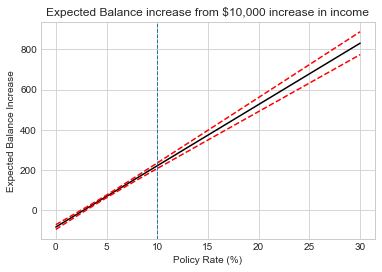

30.545000000000005
30.544


,2.5%,Estimate,97.5%
Policy Rate,,,
0.0%,-96.89,-85.06,-73.23
5.0%,61.09,67.66,74.24
8.0%,149.14,159.30,169.46
10.0%,206.51,220.38,234.26
12.0%,263.55,281.47,299.39
15.0%,348.86,373.10,397.35
20.0%,490.77,525.83,560.88
30.0%,774.26,831.27,888.28


In [20]:
rates = np.arange(0, .31, .01)
vals = pd.DataFrame([get_policy_expected_balance(x) for x in rates], # List Comprehension = lapply
                    columns=['2.5%', 'Estimate', '97.5%'], index=[str(round(x*100,1)) + '%' for x in rates])
vals.index.name = 'Policy Rate'

plt.style.use('seaborn-whitegrid')
plt.plot(rates*100, vals.iloc[:,1], color='k')
plt.plot(rates*100, vals.iloc[:,0], color='r', ls='--')
plt.plot(rates*100, vals.iloc[:,2], color='r', ls='--')
plt.ylabel('Expected Balance Increase')
plt.xlabel('Policy Rate (%)')
plt.title('Expected Balance increase from $10,000 increase in income')
plt.axvline(x=10, ls='--', lw=1)
plt.show()

print((get_policy_expected_balance(.2)[1] - get_policy_expected_balance(.1)[1])/10)
print((get_policy_expected_balance(.5)[1] - get_policy_expected_balance(.2)[1])/30)
# Pretty much a linear relationship...
b = get_policy_expected_balance(0)[1]
m = get_policy_expected_balance(.01)[1] - b
-b/m # Break-even point. Need at least 2.78% to break even

vals.iloc[[0,5,8,10,12,15,20,30],:]


**Research Question 4 Discussion:** To see if the policy rate should be changed, we can use contrasts again like in the 3rd research question. This time, we'll adjust the policy rates and compare the expeced balance increase. A graph is shown for balance increases of various policy rates with confidence intervals in red. Our model predicts a linear relationship, but a minimum of a 2.78\% increase in limit is required to break even. Overall, 10\% looks feasable in most cases (it more than triples the balance increase from a 5\% rate). 